### OCI Data Science - Useful Tips
<details>
<summary><font size="2">Check for Public Internet Access</font></summary>

```python
import requests
response = requests.get("https://oracle.com")
assert response.status_code==200, "Internet connection failed"
```
</details>
<details>
<summary><font size="2">Helpful Documentation </font></summary>
<ul><li><a href="https://docs.cloud.oracle.com/en-us/iaas/data-science/using/data-science.htm">Data Science Service Documentation</a></li>
<li><a href="https://docs.cloud.oracle.com/iaas/tools/ads-sdk/latest/index.html">ADS documentation</a></li>
</ul>
</details>
<details>
<summary><font size="2">Typical Cell Imports and Settings for ADS</font></summary>

```python
%load_ext autoreload
%autoreload 2
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import logging
logging.basicConfig(format='%(levelname)s:%(message)s', level=logging.ERROR)

import ads
from ads.dataset.factory import DatasetFactory
from ads.automl.provider import OracleAutoMLProvider
from ads.automl.driver import AutoML
from ads.evaluations.evaluator import ADSEvaluator
from ads.common.data import ADSData
from ads.explanations.explainer import ADSExplainer
from ads.explanations.mlx_global_explainer import MLXGlobalExplainer
from ads.explanations.mlx_local_explainer import MLXLocalExplainer
from ads.catalog.model import ModelCatalog
from ads.common.model_artifact import ModelArtifact
```
</details>
<details>
<summary><font size="2">Useful Environment Variables</font></summary>

```python
import os
print(os.environ["NB_SESSION_COMPARTMENT_OCID"])
print(os.environ["PROJECT_OCID"])
print(os.environ["USER_OCID"])
print(os.environ["TENANCY_OCID"])
print(os.environ["NB_REGION"])
```
</details>

In [134]:
import pandas as pd

In [2]:
pandas.__version__

'1.3.4'

In [3]:
import ads

In [4]:
ads.__version__

'2.5.4'

# Aula 2 - Conhecendo os dados

## Aula 2.1 - Carregando o arquivo

In [135]:
pd.read_csv('framingham.csv')

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


Clique [aqui](https://www.kaggle.com/dileep070/heart-disease-prediction-using-logistic-regression?select=framingham.csv) para acessar a base de dados

In [136]:
dados = pd.read_csv('framingham.csv')

In [137]:
dados.shape

(4238, 16)

In [138]:
dados.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [139]:
dados.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


## 2.2 Usando o Oracle ADS para importar os dados

In [141]:
import ads

In [142]:
from ads.dataset.factory import DatasetFactory

In [144]:
ds = DatasetFactory.open('framingham.csv')

loop1:   0%|          | 0/4 [00:00<?, ?it/s]

In [145]:
type(ds)

ads.dataset.dataset.ADSDataset

In [146]:
type(dados)

pandas.core.frame.DataFrame

In [147]:
ds = DatasetFactory.open('framingham.csv', target='TenYearCHD')

loop1:   0%|          | 0/4 [00:00<?, ?it/s]

In [148]:
type(ds)

ads.dataset.classification_dataset.BinaryClassificationDataset

In [149]:
ds

HTML(value='\n        <style>\n            .mostly-customized-scrollbar {\n              display: block;\n    …

BinaryClassificationDataset(target: TenYearCHD) 4,238 rows, 16 columns

In [151]:
dict_eng_port = {
                 'male': 'sexo',
                 'age': 'idade',
                 'education': 'escolaridade',
                 'currentSmoker': 'fumante',
                 'cigsPerDay': 'cigarros_por_dia',                 
                 'BPMeds': 'uso_medicamento_pressao',
                 'prevalentStroke': 'AVC',
                 'prevalentHyp': 'hipertensao',
                 'diabetes': 'diabetes',
                 'totChol': 'colesterol_total',
                 'sysBP': 'pressao_arterial_sistolica',
                 'diaBP': 'pressao_arterial_diastolica',
                 'BMI': 'IMC',
                 'heartRate': 'freq_cardiaca',
                 'glucose': 'glicemia',
                 'TenYearCHD': 'risco_DAC_decada'
}

In [154]:
ds =ds.rename_columns(columns=dict_eng_port)

In [155]:
ds.columns

Index(['sexo', 'idade', 'escolaridade', 'fumante', 'cigarros_por_dia',
       'uso_medicamento_pressao', 'AVC', 'hipertensao', 'diabetes',
       'colesterol_total', 'pressao_arterial_sistolica',
       'pressao_arterial_diastolica', 'IMC', 'freq_cardiaca', 'glicemia',
       'risco_DAC_decada'],
      dtype='object')

In [156]:
ds.head()

,sexo,idade,escolaridade,fumante,cigarros_por_dia,uso_medicamento_pressao,AVC,hipertensao,diabetes,colesterol_total,pressao_arterial_sistolica,pressao_arterial_diastolica,IMC,freq_cardiaca,glicemia,risco_DAC_decada
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [157]:
ds = ds.drop_columns('escolaridade')

In [158]:
ds.columns

Index(['sexo', 'idade', 'fumante', 'cigarros_por_dia',
       'uso_medicamento_pressao', 'AVC', 'hipertensao', 'diabetes',
       'colesterol_total', 'pressao_arterial_sistolica',
       'pressao_arterial_diastolica', 'IMC', 'freq_cardiaca', 'glicemia',
       'risco_DAC_decada'],
      dtype='object')

## Aula 2.3 - Trabalhando com um ADS DataFrame

Clique [aqui](https://www.kaggle.com/dileep070/heart-disease-prediction-using-logistic-regression?select=framingham.csv) para acessar a base de dados

In [160]:
ds

HTML(value='\n        <style>\n            .mostly-customized-scrollbar {\n              display: block;\n    …

BinaryClassificationDataset(target: risco_DAC_decada) 4,238 rows, 15 columns

In [161]:
ds.summary()

,Feature,Datatype
0,risco_DAC_decada,categorical/int64
1,sexo,categorical/int64
2,idade,ordinal/int64
3,fumante,categorical/int64
4,cigarros_por_dia,ordinal/float64
5,uso_medicamento_pressao,categorical/float64
6,AVC,categorical/int64
7,hipertensao,categorical/int64
8,diabetes,categorical/int64
9,colesterol_total,ordinal/float64


In [162]:
ds.astype(types={'cigarros_por_dia':'int64'})

IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer

In [163]:
ds.cigarros_por_dia.unique()

array([ 0., 20., 30., 23., 15.,  9., 10.,  5., 35., 43.,  1., 40.,  3.,
        2., nan, 12.,  4., 18., 25., 60., 14., 45.,  8., 50., 13., 11.,
        7.,  6., 38., 29., 17., 16., 19., 70.])

In [164]:
ds.isnull().sum()

sexo                             0
idade                            0
fumante                          0
cigarros_por_dia                29
uso_medicamento_pressao         53
AVC                              0
hipertensao                      0
diabetes                         0
colesterol_total                50
pressao_arterial_sistolica       0
pressao_arterial_diastolica      0
IMC                             19
freq_cardiaca                    1
glicemia                       388
risco_DAC_decada                 0
dtype: int64

In [168]:
selecao_corretos = ds.cigarros_por_dia.notnull()

In [169]:
ds = ds[selecao_corretos]

In [170]:
ds.isnull().sum()

sexo                             0
idade                            0
fumante                          0
cigarros_por_dia                 0
uso_medicamento_pressao         53
AVC                              0
hipertensao                      0
diabetes                         0
colesterol_total                50
pressao_arterial_sistolica       0
pressao_arterial_diastolica      0
IMC                             19
freq_cardiaca                    1
glicemia                       384
risco_DAC_decada                 0
dtype: int64

In [171]:
ds = ds[ds.uso_medicamento_pressao.notnull()]
ds = ds[ds.colesterol_total.notnull()]
ds = ds[ds.IMC.notnull()]
ds = ds[ds.freq_cardiaca.notnull()]

In [172]:
ds.isnull().sum()

sexo                             0
idade                            0
fumante                          0
cigarros_por_dia                 0
uso_medicamento_pressao          0
AVC                              0
hipertensao                      0
diabetes                         0
colesterol_total                 0
pressao_arterial_sistolica       0
pressao_arterial_diastolica      0
IMC                              0
freq_cardiaca                    0
glicemia                       339
risco_DAC_decada                 0
dtype: int64

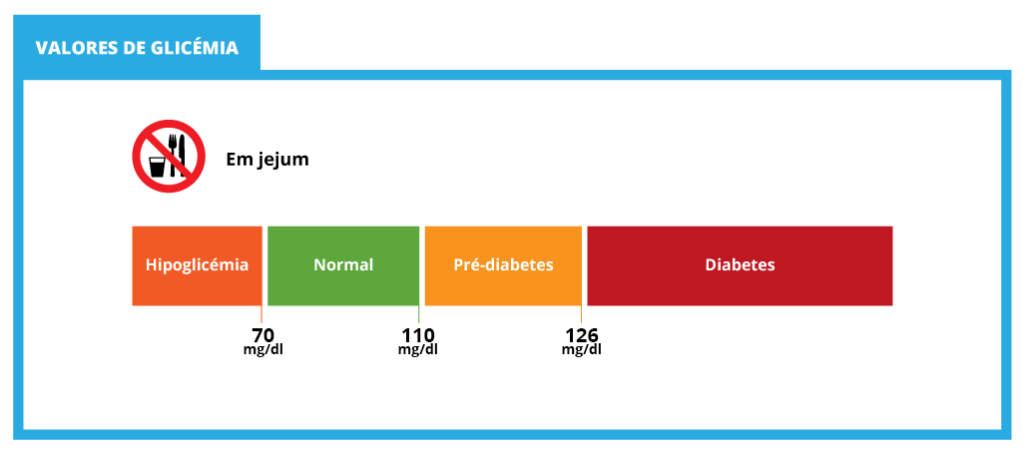

## Aula 2.4 - Trabalhando com Dados Faltantes

In [193]:
pessoas_com_diabetes = ds[ds.diabetes == 1]

In [194]:
pessoas_sem_diabetes = ds[ds.diabetes ==0]

In [196]:
pessoas_com_diabetes.glicemia.head()

37    225.0
44    215.0
56     55.0
66    202.0
96    126.0
Name: glicemia, dtype: float64

In [197]:
pessoas_com_diabetes.glicemia.mean()

169.87254901960785

In [198]:
pessoas_sem_diabetes.glicemia.mean()

79.42226487523992

In [205]:
ds.glicemia.describe()

count    3749.000000
mean       81.883169
std        23.888039
min        40.000000
25%        71.000000
50%        78.000000
75%        87.000000
max       394.000000
Name: glicemia, dtype: float64

In [200]:
ds.diabetes.value_counts()

0    3984
1     104
Name: diabetes, dtype: int64

In [201]:
import seaborn as sns

(0.0, 400.0)

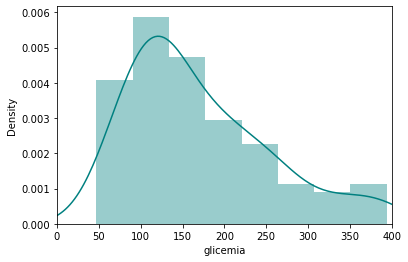

In [209]:
ax = sns.distplot(pessoas_com_diabetes.glicemia, norm_hist=False)
ax.set_xlim(0,400)

(0.0, 400.0)

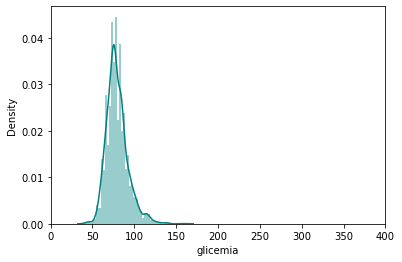

In [210]:
ax = sns.distplot(pessoas_sem_diabetes.glicemia, norm_hist=False)
ax.set_xlim(0,400)

In [211]:
nulos = ds.glicemia.isnull()

In [212]:
ds[nulos].diabetes.value_counts()

0    337
1      2
Name: diabetes, dtype: int64

In [213]:
ds.glicemia.mean()

81.88316884502534

In [215]:
ds.fillna({'glicemia': 81.8}, inplace = True)

In [216]:
ds.isnull().sum()

sexo                           0
idade                          0
fumante                        0
cigarros_por_dia               0
uso_medicamento_pressao        0
AVC                            0
hipertensao                    0
diabetes                       0
colesterol_total               0
pressao_arterial_sistolica     0
pressao_arterial_diastolica    0
IMC                            0
freq_cardiaca                  0
glicemia                       0
risco_DAC_decada               0
dtype: int64